# Detects a piece of image in an image

In [ ]:
!pip install numpy matplotlib opencv-python

In [55]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [80]:
game_img = cv.imread('../data/mario_game.png', cv.IMREAD_UNCHANGED)
superBox_img = cv.imread('../data/superBox.png', cv.IMREAD_UNCHANGED)

In [94]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

In [57]:
def imgShow(img):
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()

In [73]:
def drawRectangle(image, template, location, line_color):
    line_type = cv.LINE_4
    
    needle_w = template.shape[1]
    needle_h = template.shape[0]
        
    top_left = location
    bottom_right = (top_left[0] + needle_w, top_left[1] + needle_h)

    cv.rectangle(image, top_left, bottom_right, line_color, line_type)

In [103]:
def match(image, template, threshold, methodStr):
    method = eval(methodStr)
    
    result = cv.matchTemplate(image, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

    print("max_val", max_val)
    if max_val >= threshold:
        drawRectangle(image, template, max_loc, (0,255,0))

In [90]:
def multipleMatch(image, template, threshold, methodStr):
    method = eval(methodStr)
        
    result = cv.matchTemplate(image, template, method)
    locations = np.where(result >= threshold)
    locations = list(zip(*locations[::-1]))
    
    if locations :
        for location in locations:
            drawRectangle(image, template, location, (0,255,0))    

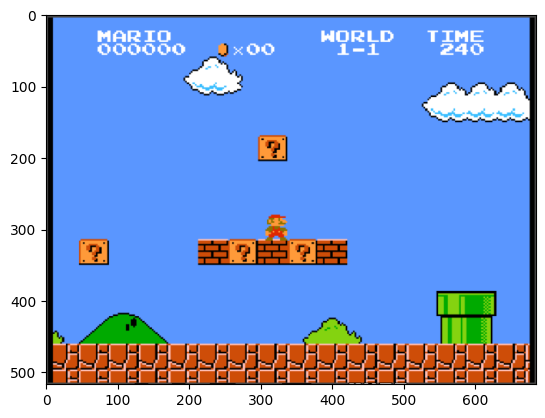

In [91]:
imgShow(game_img)

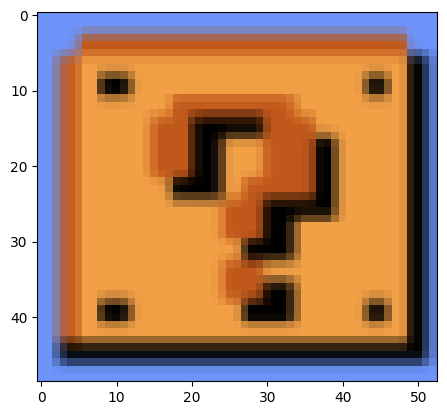

In [92]:
imgShow(superBox_img)

max_val 0.5301303267478943


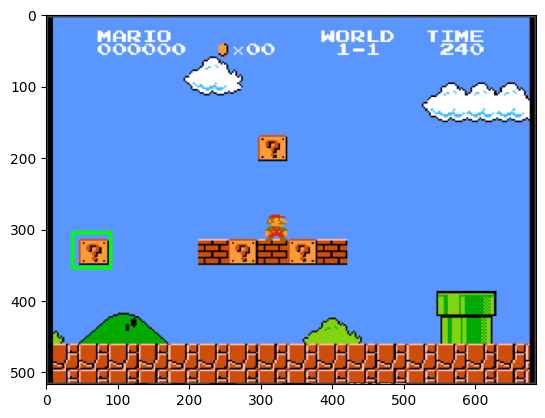

In [129]:
gameImgCopy = game_img.copy()
match(gameImgCopy, superBox_img, 0.5, "cv.TM_CCOEFF_NORMED")
imgShow(gameImgCopy)

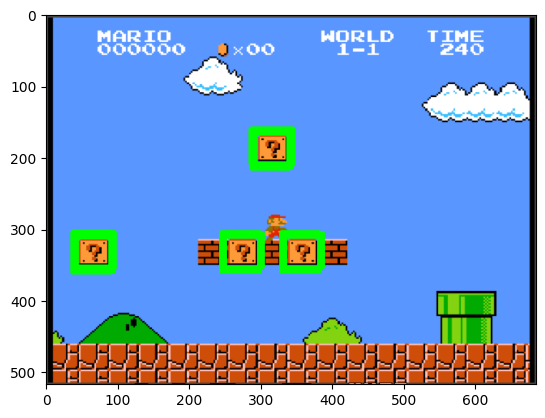

In [127]:
gameImgCopy = game_img.copy()
multipleMatch(gameImgCopy, superBox_img, 0.915, "cv.TM_CCORR_NORMED")
imgShow(gameImgCopy)